In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive


'Colab Notebooks'   Harilaxman27-Hexart_skin_disease-main


In [4]:
!ls /content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main


Harilaxman27-Hexart_skin_disease-main


In [5]:
DATASET_PATH = "/content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main"
TRAIN = f"{DATASET_PATH}/dataset/train"
VAL = f"{DATASET_PATH}/dataset/val"

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [8]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

In [9]:
SOURCE_DATASET = "/content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main/Harilaxman27-Hexart_skin_disease-main/dataset"


In [12]:
import os, shutil, random

SOURCE = "/content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main/Harilaxman27-Hexart_skin_disease-main/dataset"
BASE   = "/content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main"

TRAIN = BASE + "/train"
VAL   = BASE + "/val"

os.makedirs(TRAIN, exist_ok=True)
os.makedirs(VAL, exist_ok=True)

for cls in os.listdir(SOURCE):
    cls_path = os.path.join(SOURCE, cls)
    if not os.path.isdir(cls_path):
        continue

    images = os.listdir(cls_path)
    random.shuffle(images)

    split = int(0.8 * len(images))
    train_imgs = images[:split]
    val_imgs   = images[split:]

    os.makedirs(os.path.join(TRAIN, cls), exist_ok=True)
    os.makedirs(os.path.join(VAL, cls), exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(cls_path, img),
                    os.path.join(TRAIN, cls, img))

    for img in val_imgs:
        shutil.copy(os.path.join(cls_path, img),
                    os.path.join(VAL, cls, img))


In [16]:
import os, shutil, random

SOURCE = "/content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main/Harilaxman27-Hexart_skin_disease-main/dataset"
BASE   = "/content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main"

TRAIN = BASE + "/train"
VAL   = BASE + "/val"

IMG_EXT = (".jpg", ".jpeg", ".png", ".bmp", ".gif", ".JPG", ".JPEG", ".PNG")

os.makedirs(TRAIN, exist_ok=True)
os.makedirs(VAL, exist_ok=True)

for cls in os.listdir(SOURCE):
    cls_path = os.path.join(SOURCE, cls)
    if not os.path.isdir(cls_path):
        continue

    # recursively collect images
    images = []
    for root, _, files in os.walk(cls_path):
        for f in files:
            if f.endswith(IMG_EXT):
                images.append(os.path.join(root, f))

    print(f"{cls}: {len(images)} images found")

    if len(images) == 0:
        continue

    random.shuffle(images)
    split = int(0.8 * len(images))

    train_imgs = images[:split]
    val_imgs   = images[split:]

    os.makedirs(os.path.join(TRAIN, cls), exist_ok=True)
    os.makedirs(os.path.join(VAL, cls), exist_ok=True)

    for img in train_imgs:
        shutil.copy(img, os.path.join(TRAIN, cls, os.path.basename(img)))

    for img in val_imgs:
        shutil.copy(img, os.path.join(VAL, cls, os.path.basename(img)))


In [20]:
BASE = "/content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main/Harilaxman27-Hexart_skin_disease-main"
IMG_DIR = BASE + "/dataset"
CSV = BASE + "/dataset/metadata.csv"
OUT = BASE + "/dataset_by_class"


In [24]:
import os
import shutil
import pandas as pd

# ===== CONFIG (DO NOT CHANGE UNLESS PATH IS DIFFERENT) =====
BASE = "/content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main/Harilaxman27-Hexart_skin_disease-main"
IMG_DIR = BASE + "/dataset"
CSV = BASE + "/dataset/metadata.csv"
OUT = BASE + "/dataset_by_class"

# ===== LOAD CSV =====
df = pd.read_csv(CSV)

# ===== CREATE OUTPUT DIR =====
os.makedirs(OUT, exist_ok=True)

# ===== COPY IMAGES WITH EXTENSION CHECK =====
missing = 0
copied = 0
EXTS = [".jpg", ".png", ".jpeg"]

for i, row in enumerate(df.itertuples(), start=1):
    image_id = row.image_id
    label = row.dx

    dst_dir = os.path.join(OUT, label)
    os.makedirs(dst_dir, exist_ok=True)

    found = False
    for ext in EXTS:
        src = os.path.join(IMG_DIR, image_id + ext)
        if os.path.exists(src):
            shutil.copy(src, os.path.join(dst_dir, image_id + ext))
            copied += 1
            found = True
            break

    if not found:
        missing += 1

    # Progress update every 200 images
    if i % 200 == 0:
        print(f"Processed {i} images")

print("\n========== SUMMARY ==========")
print("Total images in CSV:", len(df))
print("Images copied:", copied)
print("Missing images:", missing)
print("Output folder:", OUT)


Processed 200 images
Processed 400 images
Processed 600 images
Processed 800 images
Processed 1000 images
Processed 1200 images
Processed 1400 images
Processed 1600 images
Processed 1800 images
Processed 2000 images

========== SUMMARY ==========
Total images in CSV: 2000
Images copied: 2000
Missing images: 0
Output folder: /content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main/Harilaxman27-Hexart_skin_disease-main/dataset_by_class


In [26]:
import tensorflow as tf

DATASET = "/content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main/Harilaxman27-Hexart_skin_disease-main/dataset_by_class"

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
NUM_CLASSES = len(class_names)

print("Classes:", class_names)


Found 2000 files belonging to 7 classes.
Using 1600 files for training.
Found 2000 files belonging to 7 classes.
Using 400 files for validation.
Classes: ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [27]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)


In [28]:
from tensorflow.keras import layers, models

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

base_model = tf.keras.applications.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)
base_model.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [29]:
inputs = tf.keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = tf.keras.applications.resnet.preprocess_input(x)

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)
model = models.Model(inputs, outputs)


In [30]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [32]:
base_model.trainable = True

for layer in base_model.layers[:120]:
    layer.trainable = False


In [33]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [34]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)


Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 205ms/step - accuracy: 0.7354 - loss: 0.7793 - val_accuracy: 0.7825 - val_loss: 0.8793
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - accuracy: 0.7434 - loss: 0.6934 - val_accuracy: 0.7825 - val_loss: 0.8571
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.7704 - loss: 0.5656 - val_accuracy: 0.7775 - val_loss: 0.8303
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 192ms/step - accuracy: 0.7878 - loss: 0.5921 - val_accuracy: 0.7800 - val_loss: 0.8175
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - accuracy: 0.8114 - loss: 0.4940 - val_accuracy: 0.7775 - val_loss: 0.8042
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.8284 - loss: 0.4820 - val_accuracy: 0.7550 - val_loss: 0.8382
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.8240 - loss: 0.4304 - val_accuracy: 0.7675 - val_loss: 0.8416
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.8487 - loss: 0

In [41]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=3)
    ]
)


Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.8991 - loss: 0.2872 - val_accuracy: 0.7675 - val_loss: 0.8873 - learning_rate: 1.0000e-05
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.9010 - loss: 0.2783 - val_accuracy: 0.7650 - val_loss: 0.8771 - learning_rate: 1.0000e-05
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.9073 - loss: 0.2583 - val_accuracy: 0.7675 - val_loss: 0.8900 - learning_rate: 1.0000e-05
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.9094 - loss: 0.2487 - val_accuracy: 0.7700 - val_loss: 0.8847 - learning_rate: 1.0000e-05
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.8999 - loss: 0.2519 - val_accuracy: 0.7825 - val_loss: 0.9067 - learning_rate: 1.0000e-05
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - accuracy: 0.9231 - loss: 0.2299 - val_accuracy: 0.7850 - val_loss: 0.8975 - learning_rate: 1.0000e-06
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 23

In [55]:
final_train_acc = history.history['accuracy'][-1] * 100
final_val_acc   = history.history['val_accuracy'][-1] * 100
final_train_loss = history.history['loss'][-1]
final_val_loss   = history.history['val_loss'][-1]

print(f"Training Accuracy    : {final_train_acc:.2f} %")
print(f"Validation Accuracy  : {final_val_acc:.2f} %")
print(f"Training Loss        : {final_train_loss:.4f}")
print(f"Validation Loss      : {final_val_loss:.4f}")


Training Accuracy    : 92.69 %
Validation Accuracy  : 78.50 %
Training Loss        : 0.2104
Validation Loss      : 0.8896


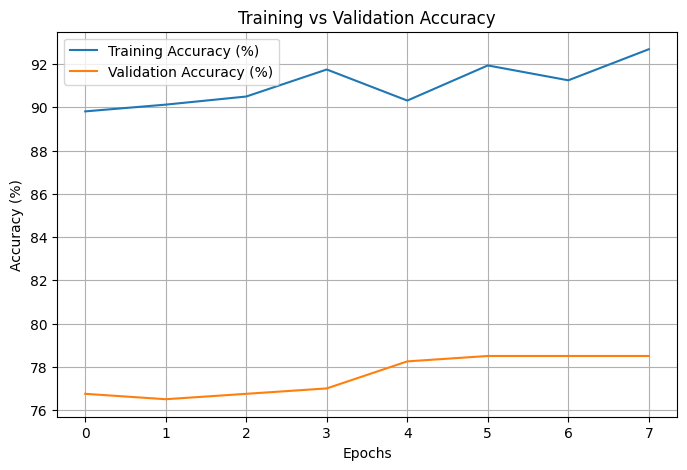

✅ Accuracy curve saved at: /content/drive/MyDrive/results/accuracy_curve.png


In [114]:
import os
import matplotlib.pyplot as plt

# Create results directory
save_dir = "/content/drive/MyDrive/results"
os.makedirs(save_dir, exist_ok=True)

# Accuracy values
train_acc = [a * 100 for a in history.history['accuracy']]
val_acc   = [a * 100 for a in history.history['val_accuracy']]

plt.figure(figsize=(8,5))
plt.plot(train_acc, label='Training Accuracy (%)')
plt.plot(val_acc, label='Validation Accuracy (%)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

# Save accuracy plot
acc_path = os.path.join(save_dir, "accuracy_curve.png")
plt.savefig(acc_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✅ Accuracy curve saved at:", acc_path)


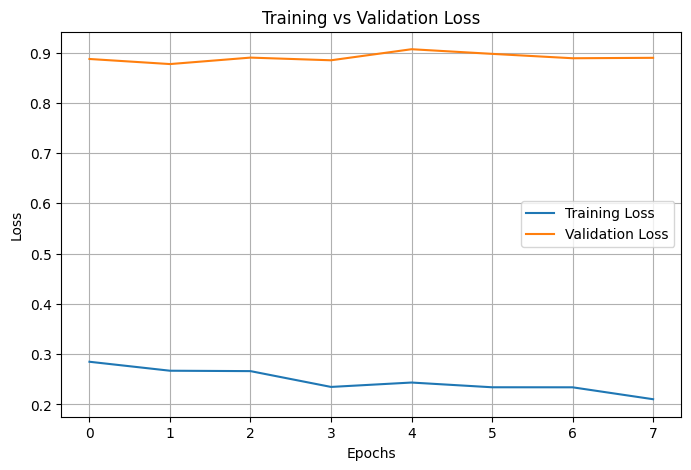

✅ Loss curve saved at: /content/drive/MyDrive/results/loss_curve.png


In [115]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

# Save loss plot
loss_path = os.path.join(save_dir, "loss_curve.png")
plt.savefig(loss_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✅ Loss curve saved at:", loss_path)


In [50]:
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


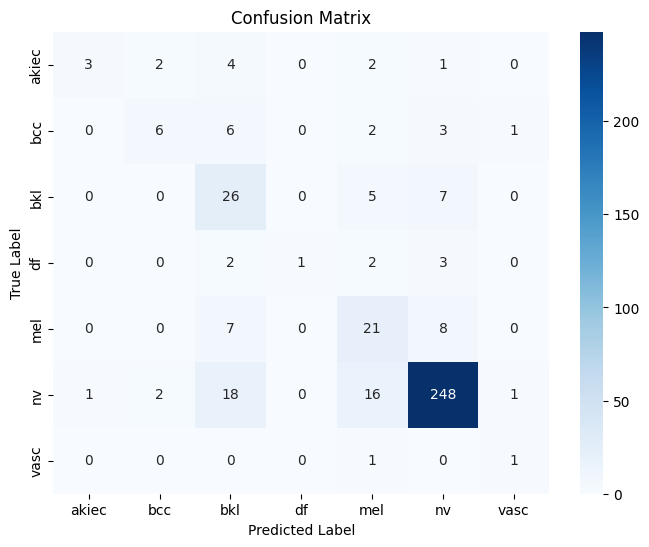

✅ Confusion matrix saved at: /content/drive/MyDrive/results/confusion_matrix.png


In [113]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create results directory
save_dir = "/content/drive/MyDrive/results"
os.makedirs(save_dir, exist_ok=True)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Save figure
save_path = os.path.join(save_dir, "confusion_matrix.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✅ Confusion matrix saved at:", save_path)


In [52]:
from sklearn.metrics import classification_report, accuracy_score

print("Overall Accuracy:", accuracy_score(y_true, y_pred))

print("\nClassification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


Overall Accuracy: 0.765

Classification Report:

              precision    recall  f1-score   support

       akiec       0.75      0.25      0.38        12
         bcc       0.60      0.33      0.43        18
         bkl       0.41      0.68      0.51        38
          df       1.00      0.12      0.22         8
         mel       0.43      0.58      0.49        36
          nv       0.92      0.87      0.89       286
        vasc       0.33      0.50      0.40         2

    accuracy                           0.77       400
   macro avg       0.63      0.48      0.48       400
weighted avg       0.81      0.77      0.77       400



In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Macro Precision:", precision_score(y_true, y_pred, average='macro'))
print("Macro Recall   :", recall_score(y_true, y_pred, average='macro'))
print("Macro F1-score :", f1_score(y_true, y_pred, average='macro'))

print("Weighted F1-score:", f1_score(y_true, y_pred, average='weighted'))


Macro Precision: 0.634731670445956
Macro Recall   : 0.47757286573076047
Macro F1-score : 0.47526415913374864
Weighted F1-score: 0.7682033646732669


In [60]:
model.save("skin_resnet_model.keras")


In [61]:
import tensorflow as tf

model = tf.keras.models.load_model("skin_resnet_model.keras")


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 74 variables whereas the saved optimizer has 146 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [66]:
tmp_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET,
    image_size=(224,224),
    batch_size=16
)

class_names = tmp_ds.class_names
print(class_names)


Found 2000 files belonging to 7 classes.
['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [68]:
tmp_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET,
    image_size=(224,224),
    batch_size=16
)

class_names = tmp_ds.class_names
print(class_names)


Found 2000 files belonging to 7 classes.
['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [70]:
img_path = "test_images/sample.jpg"   # change path if needed


In [71]:
import numpy as np
from tensorflow.keras.preprocessing import image

IMG_SIZE = (224, 224)

def preprocess_test_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.resnet.preprocess_input(img_array)
    return img_array


In [74]:
img_path = "/content/test_images/sample.jpg"


In [98]:
model.save("/content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main/skin_resnet_model.keras")


In [102]:
import tensorflow as tf

model = tf.keras.models.load_model(
    "/content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main/skin_resnet_model.keras"
)

print("✅ Model loaded successfully")


✅ Model loaded successfully


In [103]:
class_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [104]:
img_path = "/content/drive/MyDrive/test_images/ISIC_0034008.jpg"


In [105]:
!ls /content/drive/MyDrive/test_images


ls: cannot access '/content/drive/MyDrive/test_images': No such file or directory


✅ Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class : nv
Confidence      : 99.63%


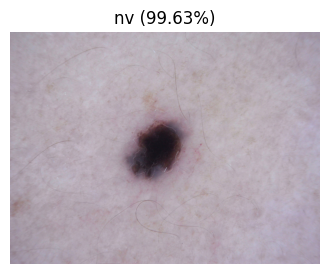

In [110]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image

# ---------- Load model ----------
model = tf.keras.models.load_model(
    "/content/drive/MyDrive/Harilaxman27-Hexart_skin_disease-main/skin_resnet_model.keras"
)
print("✅ Model loaded successfully")

# ---------- Class names (training order) ----------
class_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# ---------- Preprocess function ----------
IMG_SIZE = (224, 224)

def preprocess_test_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.resnet.preprocess_input(img_array)
    return img_array

# ---------- Correct test image path ----------
img_path = "/content/test_images/ISIC_0034008.jpg"

# ---------- Predict ----------
img = preprocess_test_image(img_path)
predictions = model.predict(img)

pred_idx = np.argmax(predictions)
pred_class = class_names[pred_idx]
confidence = predictions[0][pred_idx] * 100

print(f"Predicted Class : {pred_class}")
print(f"Confidence      : {confidence:.2f}%")

# ---------- Display ----------
plt.figure(figsize=(4,4))
plt.imshow(Image.open(img_path))
plt.axis("off")
plt.title(f"{pred_class} ({confidence:.2f}%)")
plt.show()


In [112]:
import os

# Create results folder if not exists
save_dir = "/content/drive/MyDrive/results"
os.makedirs(save_dir, exist_ok=True)

# File name
save_path = os.path.join(
    save_dir,
    f"{pred_class}_{confidence:.2f}.png"
)

# Save figure
plt.figure(figsize=(4,4))
plt.imshow(Image.open(img_path))
plt.axis("off")
plt.title(f"{pred_class} ({confidence:.2f}%)")
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.close()

print("✅ Image saved at:", save_path)


✅ Image saved at: /content/drive/MyDrive/results/nv_99.63.png
